In [17]:
import db_dtypes

## Importo lo que aparecía en el canvas del curso

In [18]:
import bq_helper
openAQ = bq_helper.BigQueryHelper(active_project= 'bigquery-public-data.nhtsa_traffic_fatalities.accident_2015',
                                 dataset_name='openaq')

#### Se hace la consulta con el fin de poder visualizar la tabla con la que queremos trabajar, que en este caso es la tabla con 70 columnas 

In [19]:
from google.cloud import bigquery
import pandas as pd
import os

# Set the environment variable for the project ID
os.environ["GCLOUD_PROJECT"] = "green-objective-382802"

# Create a client object
client = bigquery.Client()
query = """
SELECT *
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`

"""
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
headlines.head(10)

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00
5,39,Ohio,390088,8,8,0,0,0,13,13,...,11,0,None,0,None,0,None,1,0,2015-02-14 11:30:00+00:00
6,39,Ohio,390096,31,31,0,0,0,49,49,...,47,0,None,0,None,0,None,1,0,2015-02-14 14:20:00+00:00
7,42,Pennsylvania,420702,9,9,0,0,0,14,14,...,99,0,None,0,None,0,None,2,0,2015-01-18 07:30:00+00:00
8,39,Ohio,390126,29,29,0,0,0,50,50,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-02-14 14:22:00+00:00
9,34,New Jersey,340244,19,19,0,0,0,24,24,...,3,0,None,0,None,0,None,1,0,2015-02-09 21:11:00+00:00


#### 1. Crear y completar un diccionario de datos de la tabla, guardarlo en un archivo de texto separado por comas `.csv`

In [20]:
#Se crea el diccionario con los datos de la tabla en formato csv separado por comas
query12 = """
SELECT *
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
"""
df = client.query(query12).to_dataframe()

df.to_csv('datos_accidents_2015.csv', index=False) #Se guarda el df en formato csv, este es uno de los principales procedimientos que seguiré en el resto del código

In [21]:
#Esto fue una prueba para poder ver si estaba funcionando el llamar a una columna de la lista y poder verla en formato tabla
Busco = """
SELECT  county
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p1 = openAQ.query_to_pandas(Busco)
p1

,county
0,111
1,171
2,45
3,65
4,59
...,...
32533,13
32534,181
32535,63
32536,173


In [22]:
#Este es otra prueba porque quería estar segura que de verdad estaba funcionando
query1 = """
SELECT number_of_forms_submitted_for_persons_not_in_motor_vehicles
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p2 = openAQ.query_to_pandas(query1)
p2

,number_of_forms_submitted_for_persons_not_in_motor_vehicles
0,0
1,0
2,0
3,0
4,0
...,...
32533,0
32534,0
32535,0
32536,0


### 2.1. Mayor número de accidentes por estado (`state_name`).

In [23]:
query2 = """
SELECT state_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY state_name
ORDER BY num_accidents DESC
"""
#Hago la consulta para poder obtener los datos de mayor número de accidentes por estado
p3 = openAQ.query_to_pandas(query2) #se almacenan los resultados de la consulta en un dataframe (p3)
p3

,state_name,num_accidents
0,Texas,3190
1,California,3123
2,Florida,2699
3,Georgia,1329
4,North Carolina,1275
5,Pennsylvania,1102
6,New York,1061
7,Ohio,1029
8,Illinois,914
9,South Carolina,911


In [24]:
#Los resultados que guarde en p3 los paso a un csv
p3.to_csv('state_name.csv', index=False)

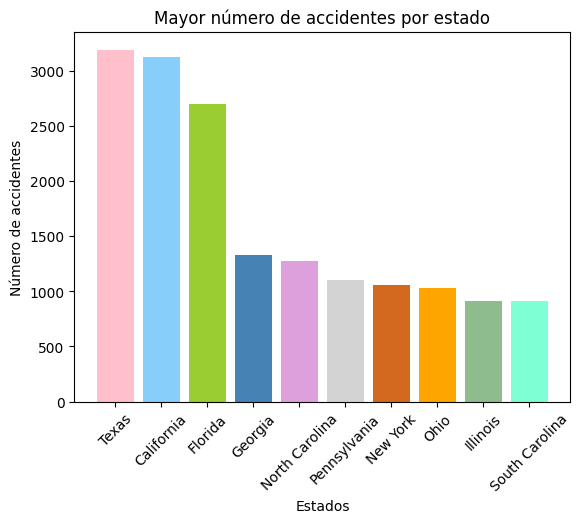

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
#se lee el csv que creé con p3 para poder graficarlos 
df = pd.read_csv('C:/Users/carol/OneDrive/Documentos/Universidat/Minería de datos/state_name.csv')
df = df.head(10)
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['state_name'], df['num_accidents'], color=colores) #las variables del grafico: estado y número de accidentes
plt.title('Mayor número de accidentes por estado')
plt.ylabel('Número de accidentes')
plt.xlabel('Estados')
plt.xticks(rotation=45)
plt.show()

### 2.2 Mayor número de accidentes por uso de tierra (`land_use`).

In [26]:
query3 = """
SELECT land_use_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY land_use_name
ORDER BY num_accidents DESC
"""
#hago la consulta para obtener los accidentes por uso de tierra
p4 = openAQ.query_to_pandas(query3)
p4

,land_use_name,num_accidents
0,Urban,16494
1,Rural,15860
2,Trafficway Not in State Inventory,150
3,Unknown,24
4,Not Reported,10


In [27]:
p4.to_csv('land_use_name.csv', index=False)

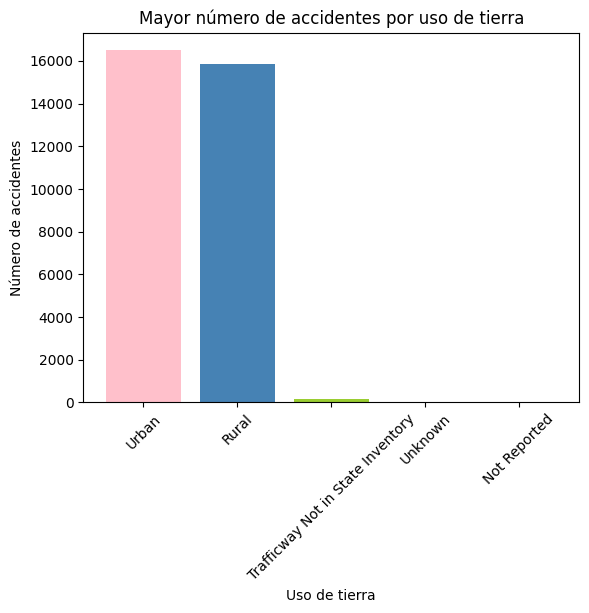

In [28]:
#se lee el csv que creé con p3 para poder graficarlos 
df = pd.read_csv("C:/Users/carol/Downloads/land_use_name.csv")
colores = ['pink', 'steelblue', 'yellowgreen', 'lightskyblue', 'plum']
plt.bar(df['land_use_name'], df['num_accidents'], color=colores) #las variables del grafico: uso de tierra y número de accidentes
plt.title('Mayor número de accidentes por uso de tierra')
plt.ylabel('Número de accidentes')
plt.xlabel('Uso de tierra')
plt.xticks(rotation=45)
plt.show()

### 2.3. Mayor número de accidentes por empresa de carreteras (`ownership_name`).

In [29]:
#Nuevamente se hace el mismo procedimiento que utilicé para el 2.1 y 2.2, se hace la consulta, se pasa a csv y luego se grafica
query4 = """
SELECT ownership_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY ownership_name
ORDER BY num_accidents DESC
"""

p5 = openAQ.query_to_pandas(query4)
p5

,ownership_name,num_accidents
0,State Highway Agency,16107
1,Not Reported,6388
2,City or Municipal Highway Agency,3390
3,County Highway Agency,3295
4,Unknown,1139
5,Town or Township Highway Agency,1046
6,Other Local Agency,738
7,Trafficway Not in State Inventory,150
8,State Toll Road,80
9,Other Federal Agency,56


In [31]:
p5.to_csv('ownership_name.csv', index=False)

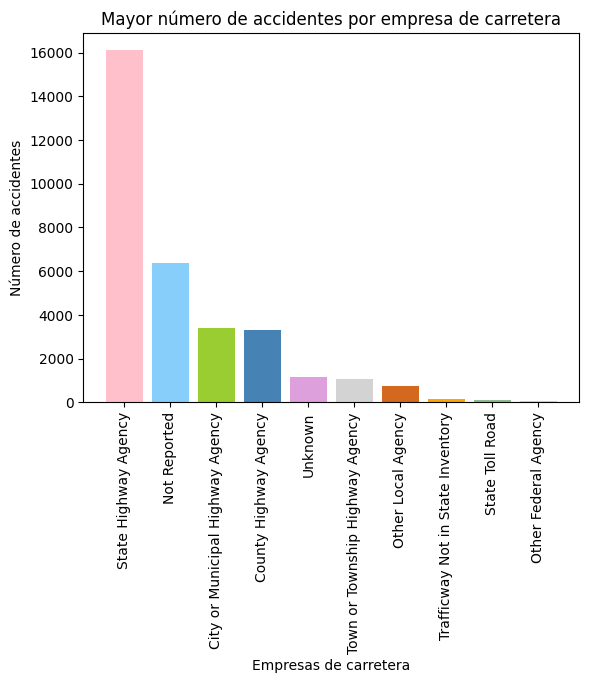

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/carol/Downloads/ownership_name.csv")
df = df.head(10) #Se ven solo los primeros 10 ya que el resto tiene tan bajo número de accidentes que no se aprecia en el gráfico, los 10 primeros son los únicos que por lo menos la barra se ve
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['ownership_name'], df['num_accidents'], color=colores)
plt.title('Mayor número de accidentes por empresa de carretera')
plt.ylabel('Número de accidentes')
plt.xlabel('Empresas de carretera')
plt.xticks(rotation=90)
plt.show()

### 2.4. Mayor número de accidentes por carretera (`trafficway_identifier`).

In [33]:
#Nuevamente, lo mismo que hice en 2.1, 2.2 y 2.3. Hice la consulta, se crea un data frame llamado p6 que luego se pasa a csv y se grafica
query5 = """
SELECT trafficway_identifier, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY trafficway_identifier
ORDER BY num_accidents DESC
"""

p6 = openAQ.query_to_pandas(query5)
p6

,trafficway_identifier,num_accidents
0,I-10,274
1,I-95,213
2,I-75,204
3,US-1,190
4,I-40,159
...,...,...
15673,GRAHAM RD,1
15674,REA RD,1
15675,SR-69 MINEOLA HWY,1
15676,CR-GRAHAM HILL RD,1


In [34]:
p6.to_csv('trafficway_identifier.csv', index=False)

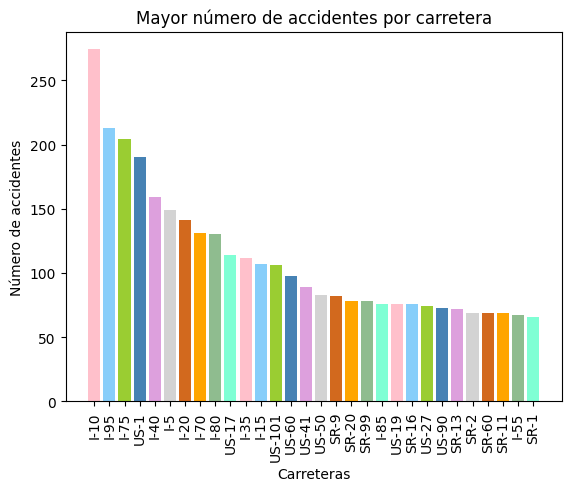

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/carol/Downloads/trafficway_identifier.csv")
df = df.head(30) #Aquí decidí mostrar 30 ya que son demasiadas carreteras y encontré que al mostrar 30 se podía ver una gran cantidad de datos sin que se viera saturado 
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['trafficway_identifier'], df['num_accidents'], color=colores)
plt.title('Mayor número de accidentes por carretera')
plt.ylabel('Número de accidentes')
plt.xlabel('Carreteras')
plt.xticks(rotation=90)
plt.show()

### 3. Realizar un análisis mensual de accidentes por estado.

In [36]:
query6 = """
SELECT state_name, EXTRACT(MONTH FROM timestamp_of_crash) as month,COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY state_name, month
ORDER BY state_name, month
"""

p7 = openAQ.query_to_pandas(query6)
p7

,state_name,month,num_accidents
0,Alabama,1,50
1,Alabama,2,37
2,Alabama,3,59
3,Alabama,4,69
4,Alabama,5,72
...,...,...,...
603,Wyoming,8,18
604,Wyoming,9,8
605,Wyoming,10,10
606,Wyoming,11,11


In [37]:
df = p7.to_csv('timestamp_of_crash.csv', index=False)

In [38]:

df = pd.read_csv("C:/Users/carol/Downloads/timestamp_of_crash.csv")

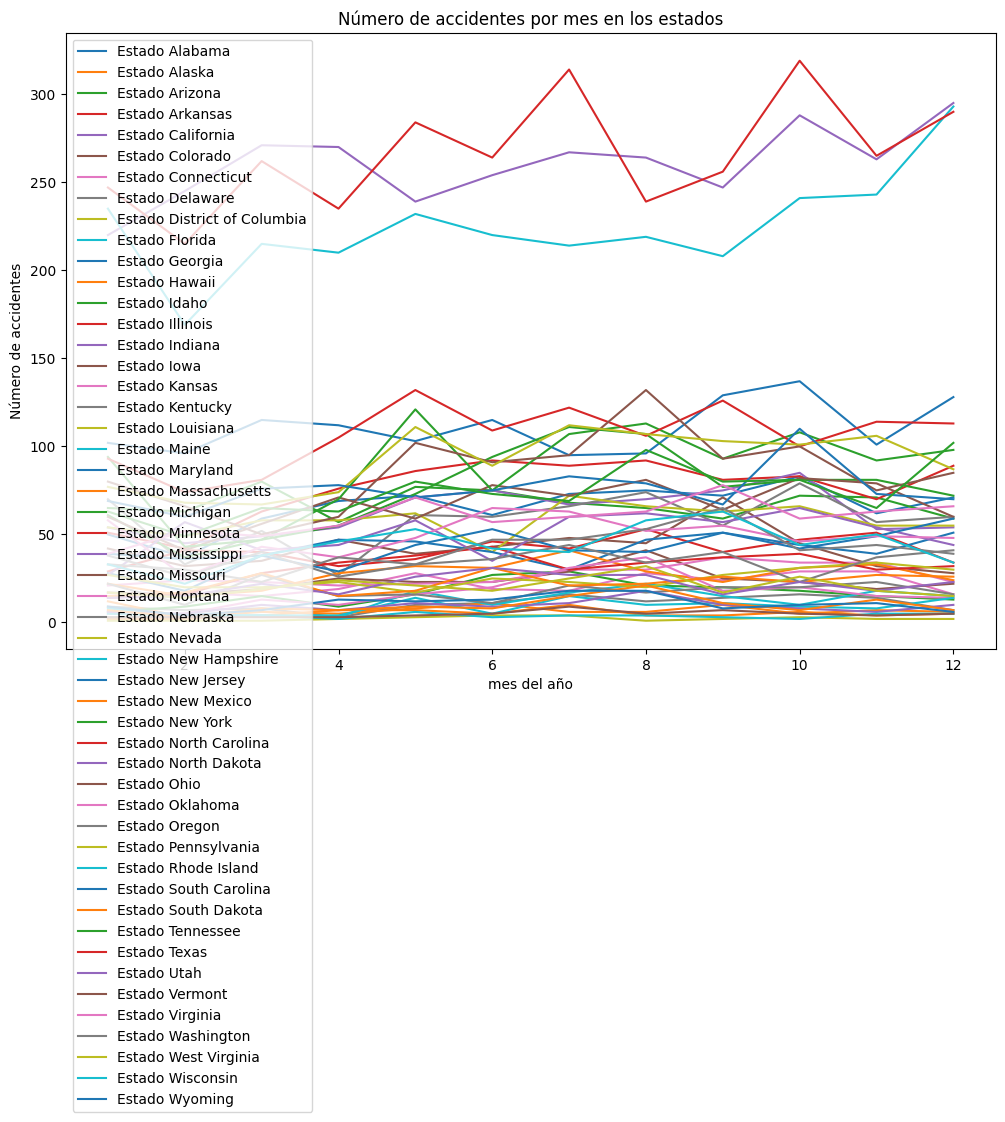

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
#Todo esto es para poder crear un gráfico de líneas
for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['month']
    num_accidents = state_data['num_accidents']
    label = f"Estado {state}"
    ax.plot(hours, num_accidents, label=label)

ax.set_xlabel("mes del año")
ax.set_ylabel("Número de accidentes")
ax.set_title("Número de accidentes por mes en los estados")
ax.legend()

plt.show()

#este quedó bastante horrible porque no supe como poder mostrar solo los con más accidentes mensuales, cuando lo intentaba solo me mostraba Alabama pero creo que igual se puede entender

##### Se puede ver en los 2 gráficos (el de arriba y el de abajo) que los estados con mayores accidentes por mes son Texas, California y Florida, estando estos verdaderamente alejados en cuanto a sus valores de los otros estados que se mantienen más o menos parejos en su mayoría. Tampoco hay una tendencia entre los 3 con más accidentes al mes con respecto a tener el mismo mes con más accidentes, por lo que no se puede sacar una conclusión como "Hay mas accidentes porque hay mas celebraciones/vacaciones".

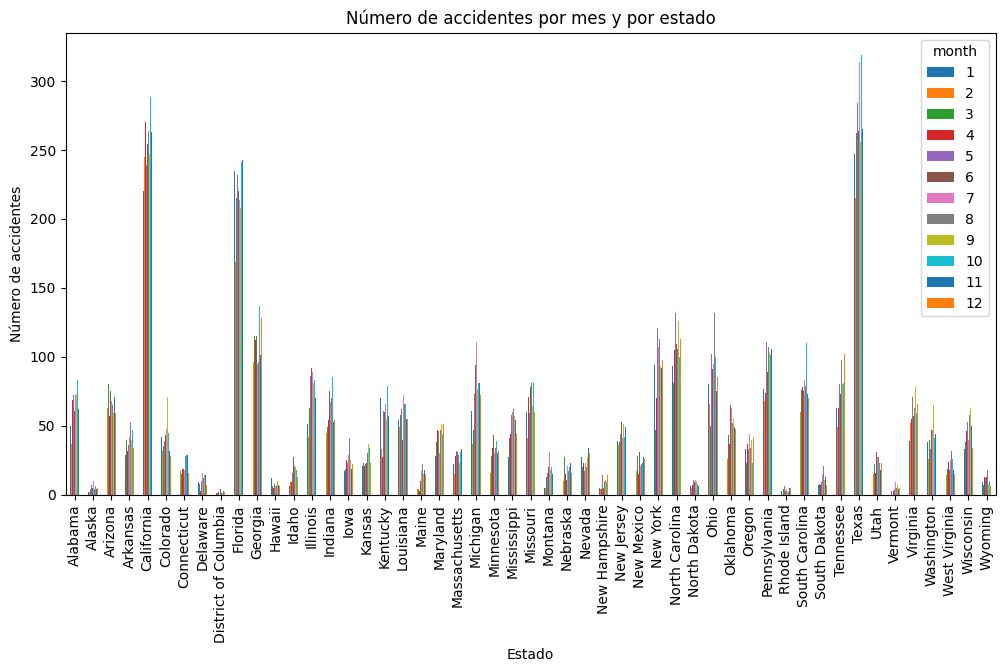

In [40]:
#Este fue el primero que hice que no se entiende nada pero igual encuentro que ayuda a entender el gráfico de arriba al notarse mejor cuales son los 3 estados con más accidentes
fig, ax = plt.subplots(figsize=(12, 6))
df.pivot(index='state_name', columns='month', values='num_accidents').plot(kind='bar', ax=ax)
plt.title('Número de accidentes por mes y por estado')
plt.xlabel('Estado')
plt.ylabel('Número de accidentes')
plt.show()

### 4. Realizar un análisis según la hora del día.
#### - Ahondar para los estados con mayor cantidad de muertes

In [41]:
query7 = """
    SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hour_of_day, SUM(number_of_fatalities) as number_of_fatalities
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE state_name IN (
        SELECT state_name
        FROM (
            SELECT state_name, SUM(number_of_fatalities) as total_fatalities
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY state_name
            ORDER BY total_fatalities DESC
            LIMIT 8
        )
    )
    GROUP BY state_name, hour_of_day
    ORDER BY state_name, hour_of_day
"""
#De la consulta se extrae la hora en la que ocurrió el accidente en x estado y gracias a SUM(number_of_fatalities) se ve el número total de muertes según el accidente
#Y además, se limita a 8 estados para que se muestren los estados con mayores muertes en accidentes
p8 = openAQ.query_to_pandas(query7)
p8

,state_name,hour_of_day,number_of_fatalities
0,California,0,210
1,California,1,133
2,California,2,157
3,California,3,103
4,California,4,103
...,...,...,...
187,Texas,19,182
188,Texas,20,193
189,Texas,21,211
190,Texas,22,184


In [42]:
df = p8.to_csv('number_of_fatalities.csv', index=False)

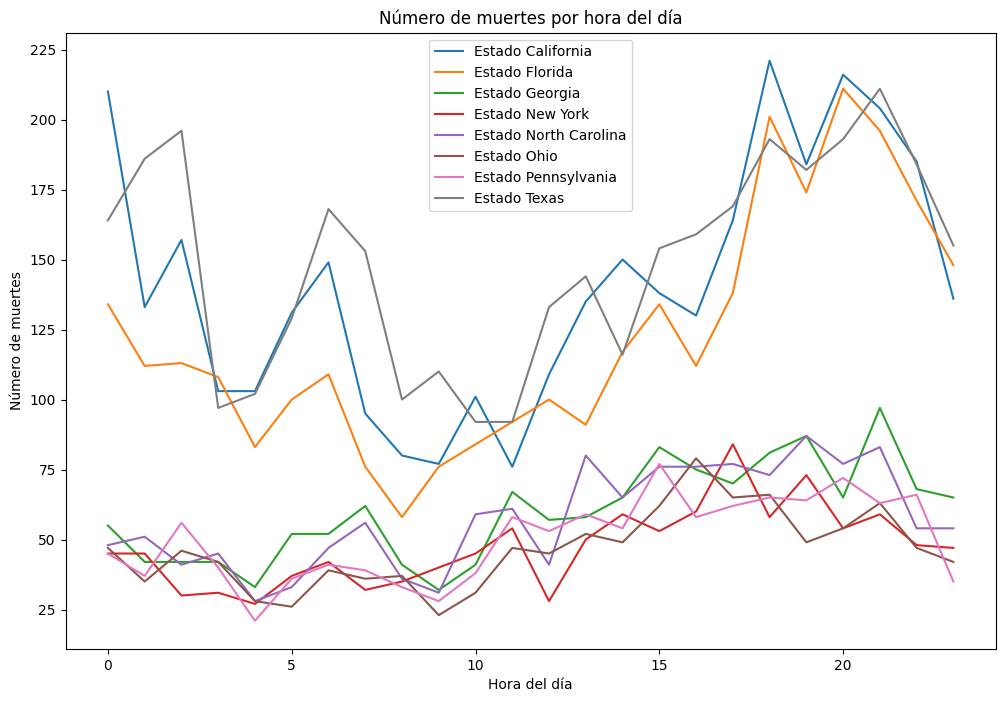

In [43]:
df = pd.read_csv("C:/Users/carol/Downloads/number_of_fatalities.csv")
fig, ax = plt.subplots(figsize=(12, 8))
#Se empieza a crear el gráfico de líneas nuevamente
for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour_of_day']
    num_fatalities = state_data['number_of_fatalities']
    label = f"Estado {state}"
    ax.plot(hours, num_fatalities, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes por hora del día")
ax.legend()

plt.show()

##### Del gráfico se puede notar que California, Texas y Florida están nuevamente arriba en cuanto a muerte o accidentes, lo que coincide con los gráficos vistos anteriormente. A diferencia del caso anterior, acá se puede notar claramente que hay ciertas horas del día que independiente del estado, son de menos accidentes/muertes por accidentes, que coinciden con las horas donde la gente generalmente esta trabajando/estudiando por lo que hay menos autos transitando. Y se nota que los peaks de muertes por accidentes se dan en las horas de las noches donde uno sabe que aunque haya poco tráfico, se tiende a andar mas despistado o cansado por el día y tienden a ser accidentes con más cantidad de muertes.
##### Con respecto a Florida y California, también se puede ver que son dos estados con una gran vida nocturna, y ser, sobre todo California, conocido por un muy ejetreado tráfico, por lo que no sorprende que en las horas de la noche tiendan a tener mayor cantidad de accidentes.

### 5.Finalmente realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios.

In [44]:
query8 = """
SELECT state_name, COUNTIF(number_of_drunk_drivers > 0) AS num_accidents_with_drunk_drivers, COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
ORDER BY num_accidents_with_drunk_drivers DESC
"""
#Se hace la consulta y se cuentan los accidentes con conductores ebrios y también el total de accidentes 
p9 = openAQ.query_to_pandas(query8)
p9

,state_name,num_accidents_with_drunk_drivers,num_accidents
0,California,959,3123
1,Texas,849,3190
2,Florida,626,2699
3,North Carolina,389,1275
4,Pennsylvania,332,1102
5,Ohio,324,1029
6,Georgia,296,1329
7,South Carolina,296,911
8,Illinois,289,914
9,Tennessee,269,888


In [45]:
df= p9.to_csv('number_of_drunk_drivers.csv', index=False) 
df = pd.read_csv("C:/Users/carol/Downloads/number_of_drunk_drivers.csv")

In [46]:
df['accident_drunk_driver_ratio'] = df['num_accidents'] / df['num_accidents_with_drunk_drivers']
#se calcula la razón entre accidentes y conductores ebrios 
df

,state_name,num_accidents_with_drunk_drivers,num_accidents,accident_drunk_driver_ratio
0,California,959,3123,3.256517
1,Texas,849,3190,3.757362
2,Florida,626,2699,4.311502
3,North Carolina,389,1275,3.277635
4,Pennsylvania,332,1102,3.319277
5,Ohio,324,1029,3.175926
6,Georgia,296,1329,4.489865
7,South Carolina,296,911,3.077703
8,Illinois,289,914,3.162630
9,Tennessee,269,888,3.301115


##### Nuevamente California, Texas y Florida están en la cabeza pero en lo que respecta a cantidad de conductores ebrios y accidentes, ya que en cuanto a la razón entre estos dos datos, no necesariamente estan liderando, incluso, dos de los tres no están nisiquiera en los con la razón más alta. Florida sigue estando en la cabeza, pero los demás fueron sobrepasados por Nueva York y Georgia, que si bien tienen una cantidad de accidentes de menos de la mitad que California y Texas, tienen una mayor cantidad de accidentes por conductor ebrio que los otros dos estados.

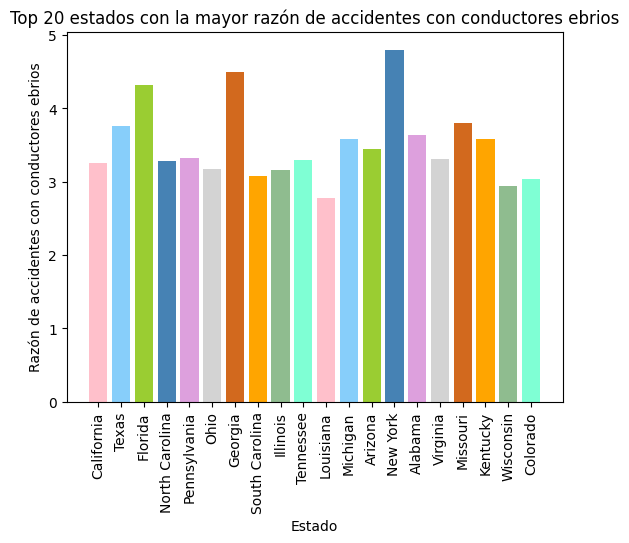

In [47]:
df = df.head(20)
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['state_name'], df['accident_drunk_driver_ratio'], color= colores)
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Razón de accidentes con conductores ebrios')
plt.title('Top 20 estados con la mayor razón de accidentes con conductores ebrios')
plt.show()